# EDA for a randomly selected user

## Load packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load random user data

In [6]:
user_number = 5
path = f"data/S{user_number:02d}_data.parquet" # input path to a parquet

df = pd.read_parquet(path)

In [7]:
df.columns

Index(['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y',
       'diameter', 'EKG', 'light', 'EDA', 'HR', 'trigger', 'valence_rating',
       'arousal_rating', 'start_timestamp', 'duration', 'norm_pos_x_fixation',
       'norm_pos_y_fixation', 'dispersion', 'confidence_fixation',
       'end_timestamp', 'user_id', 'categorised_rating',
       'fixation_duration_mean', 'fixation_duration_variance',
       'fixation_duration_skewness', 'fixation_duration_kurtosis',
       'fixation_dispersion_mean', 'fixation_dispersion_variance',
       'fixation_dispersion_skewness', 'fixation_dispersion_kurtosis',
       'fixation_position_x_mean', 'fixation_position_x_variance',
       'fixation_position_x_skewness', 'fixation_position_x_kurtosis',
       'fixation_position_y_mean', 'fixation_position_y_variance',
       'fixation_position_y_skewness', 'fixation_position_y_kurtosis',
       'pupil_diameter_mean', 'pupil_diameter_variance',
       'pupil_diameter_skewness', 'pupil_

In [22]:
df.head()

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,EKG,light,EDA,HR,...,pupil_diameter_skewness,pupil_diameter_kurtosis,pupil_position_x_mean,pupil_position_x_variance,pupil_position_x_skewness,pupil_position_x_kurtosis,pupil_position_y_mean,pupil_position_y_variance,pupil_position_y_skewness,pupil_position_y_kurtosis
0,1970-01-01 00:05:47.590989,1,0.963616,0.533210,0.510250,14.774166,0.034899,-0.468103,1.699452,-0.966189,...,NaN,NaN,0.533210,NaN,NaN,NaN,0.510250,NaN,NaN,NaN
1,1970-01-01 00:05:47.591129,0,1.000000,0.464573,0.384155,12.591374,0.034899,-0.468103,1.699452,-0.966189,...,NaN,NaN,0.498892,0.002356,NaN,NaN,0.447202,0.007950,NaN,NaN
2,1970-01-01 00:05:47.599154,0,0.958762,0.464881,0.384176,12.683758,0.034899,-0.468103,1.699452,-0.966189,...,1.721144,NaN,0.487555,0.001563,1.731932,NaN,0.426194,0.005299,1.732051e+00,NaN
3,1970-01-01 00:05:47.599154,1,0.889711,0.533560,0.510210,15.248650,0.034899,-0.468103,1.699452,-0.966189,...,0.096836,-5.400354,0.499056,0.001571,0.000015,-5.999308,0.447198,0.005297,1.822234e-07,-5.999998
4,1970-01-01 00:05:47.607229,1,0.953736,0.533382,0.510811,15.225353,0.034899,-0.468103,1.699452,-0.966189,...,-0.526513,-3.220490,0.505922,0.001414,-0.608569,-3.333037,0.459921,0.004782,-6.085267e-01,-3.333254


## Drop rows where valence or arousal is nan

In [23]:
# Drop rows where valence or arousal or trigger are NaN

df = df.dropna(subset=['valence_rating', 'arousal_rating', 'trigger'])

In [25]:
# 1) make sure ratings are numeric
df['valence_rating']  = pd.to_numeric(df['valence_rating'],  errors='coerce')
df['arousal_rating']  = pd.to_numeric(df['arousal_rating'], errors='coerce')

# 2) drop any rows that became NaN after coercion
df = df.dropna(subset=['valence_rating', 'arousal_rating', 'trigger'])

# 3) now compute means per trigger on just that one column
valence_per_trigger = df.groupby('trigger')['valence_rating'].mean().reset_index()
arousal_per_trigger = df.groupby('trigger')['arousal_rating'].mean().reset_index()

In [26]:
# valence_per_trigger = df.groupby('trigger').mean()["valence_rating"].to_frame().reset_index()

# arousal_per_trigger = df.groupby('trigger').mean()["arousal_rating"].to_frame().reset_index()

### Valence and Arousal rating distribution

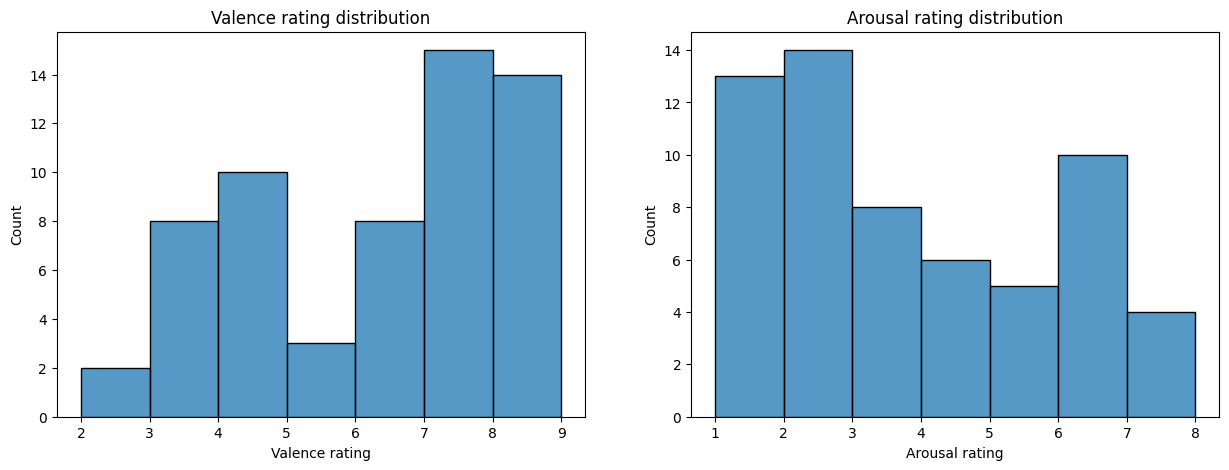

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(valence_per_trigger["valence_rating"], ax=axs[0])
axs[0].set_title("Valence rating distribution")
axs[0].set_xlabel("Valence rating")

sns.histplot(arousal_per_trigger["arousal_rating"], ax=axs[1])
axs[1].set_title("Arousal rating distribution")
axs[1].set_xlabel("Arousal rating")

plt.show()

### Bitalino in time

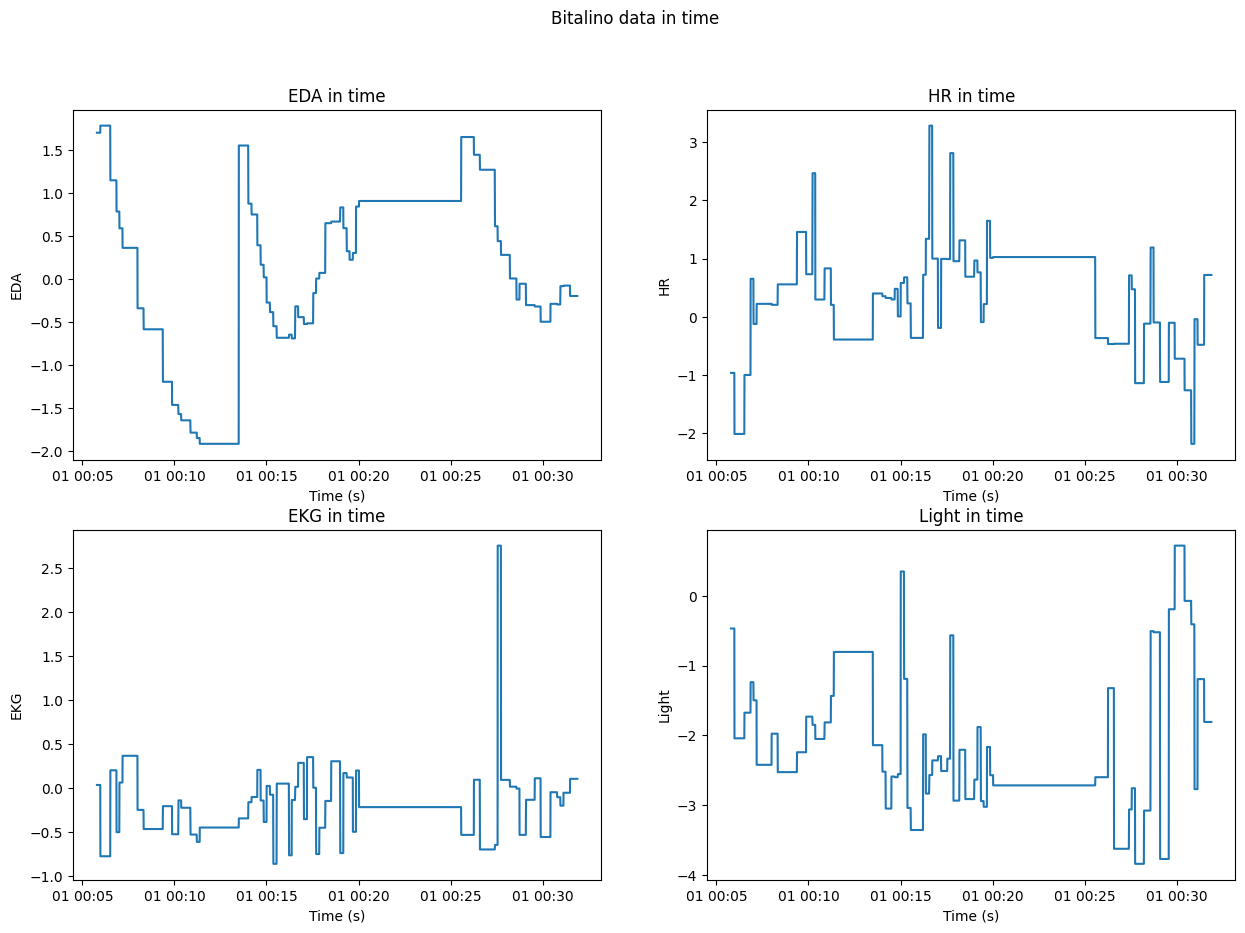

In [28]:
df_sorted = df.sort_values(by=['pupil_timestamp'])

# Get row every 100 rows in pupil_timestamp
df_sorted = df_sorted.iloc[::100, :]

# Plot EDA in time
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle("Bitalino data in time")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="EDA", ax=axs[0, 0])
axs[0, 0].set_title("EDA in time")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("EDA")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="HR", ax=axs[0, 1])
axs[0, 1].set_title("HR in time")
axs[0, 1].set_xlabel("Time (s)")
axs[0, 1].set_ylabel("HR")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="EKG", ax=axs[1, 0])
axs[1, 0].set_title("EKG in time")
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_ylabel("EKG")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="light", ax=axs[1, 1])
axs[1, 1].set_title("Light in time")
axs[1, 1].set_xlabel("Time (s)")
axs[1, 1].set_ylabel("Light")


plt.show()

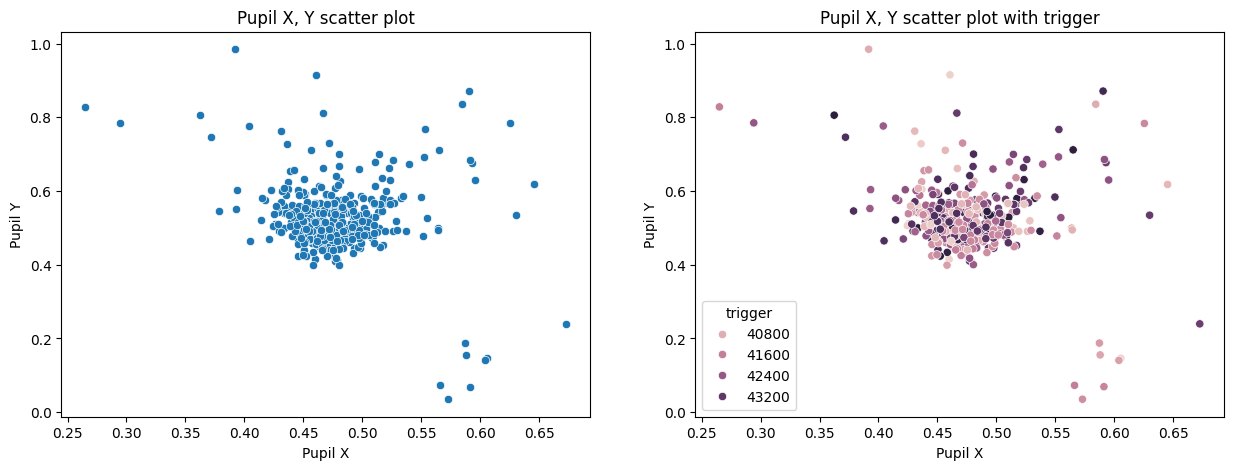

In [29]:
# X, Y of pupil scatter plot

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df_fixated = df[df["norm_pos_y_fixation"] > 0]
sns.scatterplot(data=df_fixated[::100], x="norm_pos_x_fixation", y="norm_pos_y_fixation", ax=axs[0])
axs[0].set_title("Pupil X, Y scatter plot")
axs[0].set_xlabel("Pupil X")
axs[0].set_ylabel("Pupil Y")

sns.scatterplot(data=df_fixated[::100], x="norm_pos_x_fixation", y="norm_pos_y_fixation", hue="trigger", ax=axs[1])
axs[1].set_title("Pupil X, Y scatter plot with trigger")
axs[1].set_xlabel("Pupil X")
axs[1].set_ylabel("Pupil Y")    

plt.show()

In [32]:
df

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,EKG,light,EDA,HR,...,pupil_diameter_skewness,pupil_diameter_kurtosis,pupil_position_x_mean,pupil_position_x_variance,pupil_position_x_skewness,pupil_position_x_kurtosis,pupil_position_y_mean,pupil_position_y_variance,pupil_position_y_skewness,pupil_position_y_kurtosis
0,1970-01-01 00:05:47.590989,1,0.963616,0.533210,0.510250,14.774166,0.034899,-0.468103,1.699452,-0.966189,...,NaN,NaN,0.533210,NaN,NaN,NaN,0.510250,NaN,NaN,NaN
1,1970-01-01 00:05:47.591129,0,1.000000,0.464573,0.384155,12.591374,0.034899,-0.468103,1.699452,-0.966189,...,NaN,NaN,0.498892,0.002356,NaN,NaN,0.447202,0.007950,NaN,NaN
2,1970-01-01 00:05:47.599154,0,0.958762,0.464881,0.384176,12.683758,0.034899,-0.468103,1.699452,-0.966189,...,1.721144,NaN,0.487555,0.001563,1.731932,NaN,0.426194,0.005299,1.732051e+00,NaN
3,1970-01-01 00:05:47.599154,1,0.889711,0.533560,0.510210,15.248650,0.034899,-0.468103,1.699452,-0.966189,...,0.096836,-5.400354,0.499056,0.001571,0.000015,-5.999308,0.447198,0.005297,1.822234e-07,-5.999998
4,1970-01-01 00:05:47.607229,1,0.953736,0.533382,0.510811,15.225353,0.034899,-0.468103,1.699452,-0.966189,...,-0.526513,-3.220490,0.505922,0.001414,-0.608569,-3.333037,0.459921,0.004782,-6.085267e-01,-3.333254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192676,1970-01-01 00:31:53.849748,0,0.809493,0.402231,0.355524,12.951631,0.104946,-1.806585,-0.195918,0.718950,...,0.715343,1.557487,0.482251,0.008290,-1.016542,2.615770,0.436812,0.007288,-1.662033e-01,2.048027
192677,1970-01-01 00:31:53.861774,1,0.840136,0.586970,0.483888,16.100147,0.104946,-1.806585,-0.195918,0.718950,...,0.719563,1.582676,0.482406,0.008326,-1.014399,2.590385,0.436872,0.007292,-1.689368e-01,2.052763
192678,1970-01-01 00:31:53.869768,1,0.877353,0.587188,0.485215,16.358603,0.104946,-1.806585,-0.195918,0.718950,...,0.724194,1.604389,0.482604,0.008379,-1.012641,2.555818,0.437043,0.007307,-1.751529e-01,2.054842
192679,1970-01-01 00:31:53.877851,1,0.838067,0.586901,0.485423,15.985807,0.104946,-1.806585,-0.195918,0.718950,...,0.736405,1.667957,0.482656,0.008428,-1.007384,2.521066,0.436953,0.007316,-1.739911e-01,2.061221


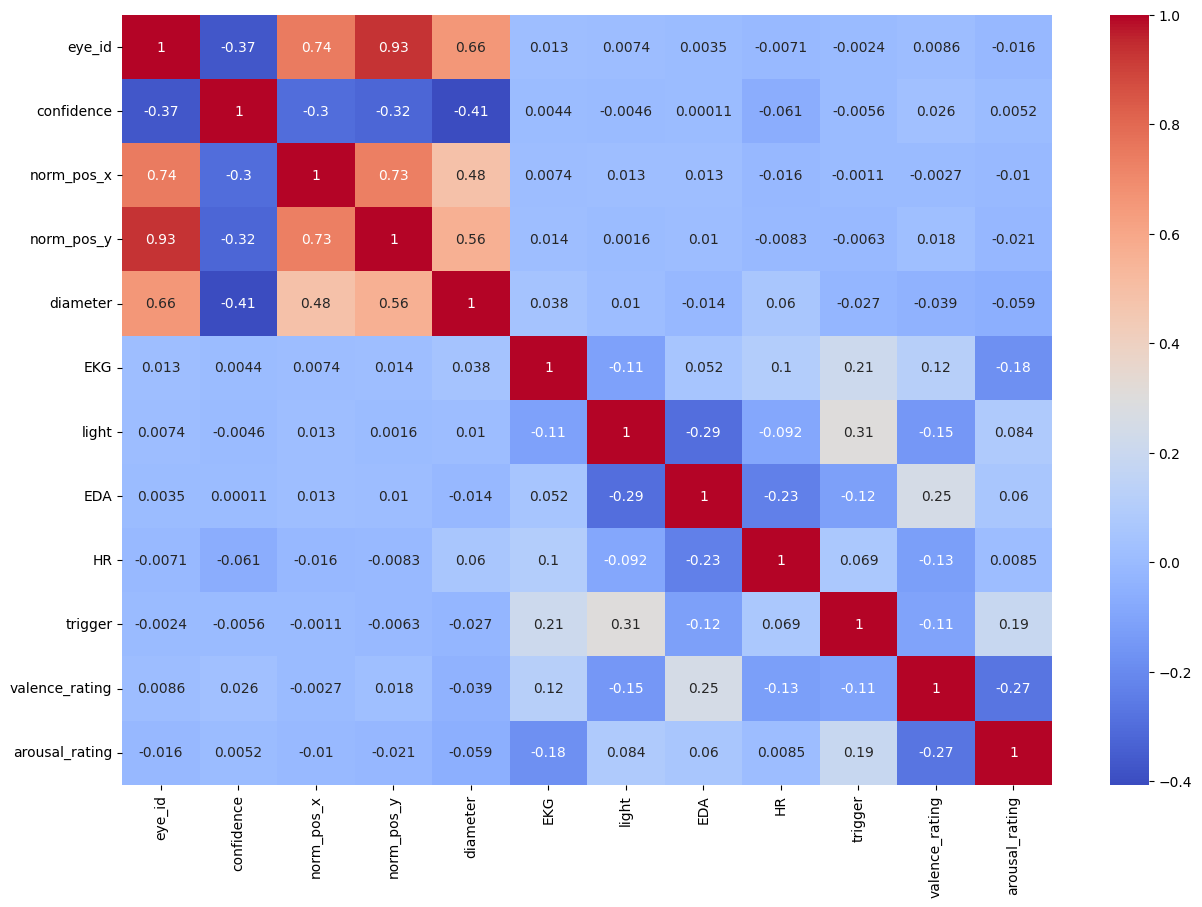

In [47]:
# Print correlation matrix

columns_of_interest = ["pupil_timestamp", "eye_id", "confidence", "norm_pos_x", "norm_pos_y", "diameter", "EKG", "light", "EDA", "HR", "trigger", "valence_rating", "arousal_rating"]
corr = df[columns_of_interest].corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")
plt.show()

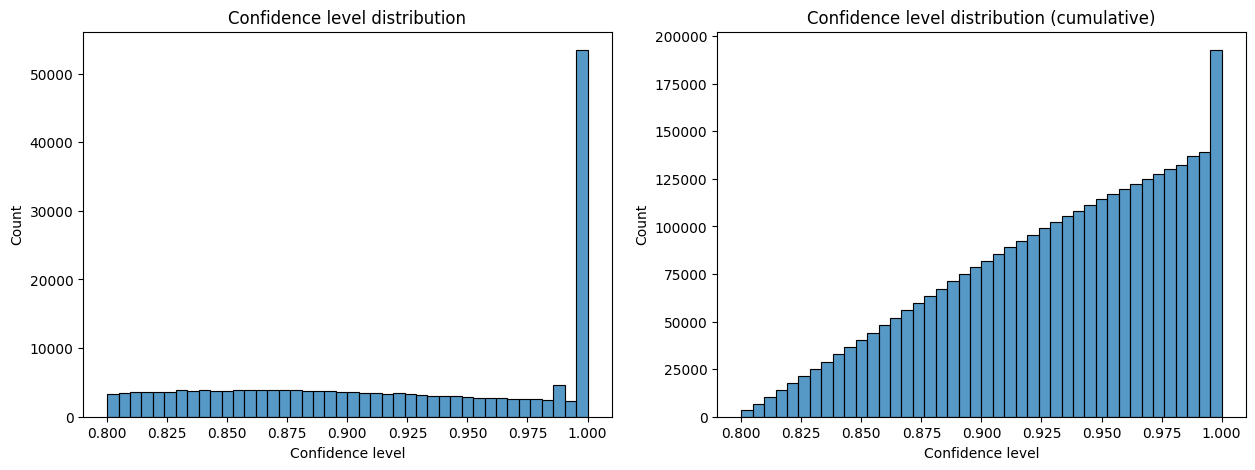

In [33]:
# Confidence level distribution

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["confidence"], ax=axs[0])
axs[0].set_title("Confidence level distribution")
axs[0].set_xlabel("Confidence level")

sns.histplot(df["confidence"], ax=axs[1], cumulative=True)
axs[1].set_title("Confidence level distribution (cumulative)")
axs[1].set_xlabel("Confidence level")

plt.show()

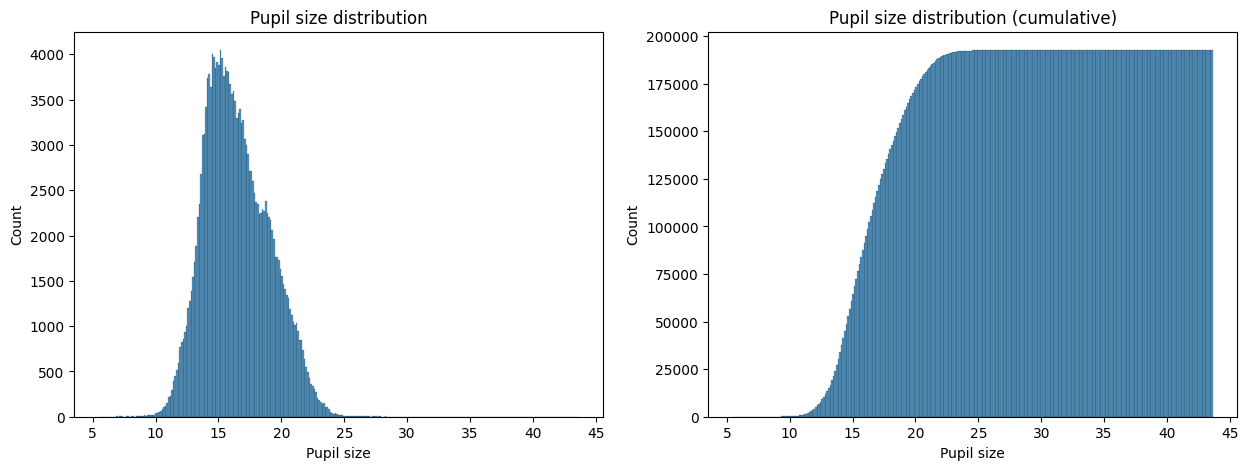

In [34]:
# Pupil size distribution

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["diameter"], ax=axs[0])
axs[0].set_title("Pupil size distribution")
axs[0].set_xlabel("Pupil size")

sns.histplot(df["diameter"], ax=axs[1], cumulative=True)
axs[1].set_title("Pupil size distribution (cumulative)")
axs[1].set_xlabel("Pupil size")

plt.show()

## Scatter plots of Arousal vs Bitalino data

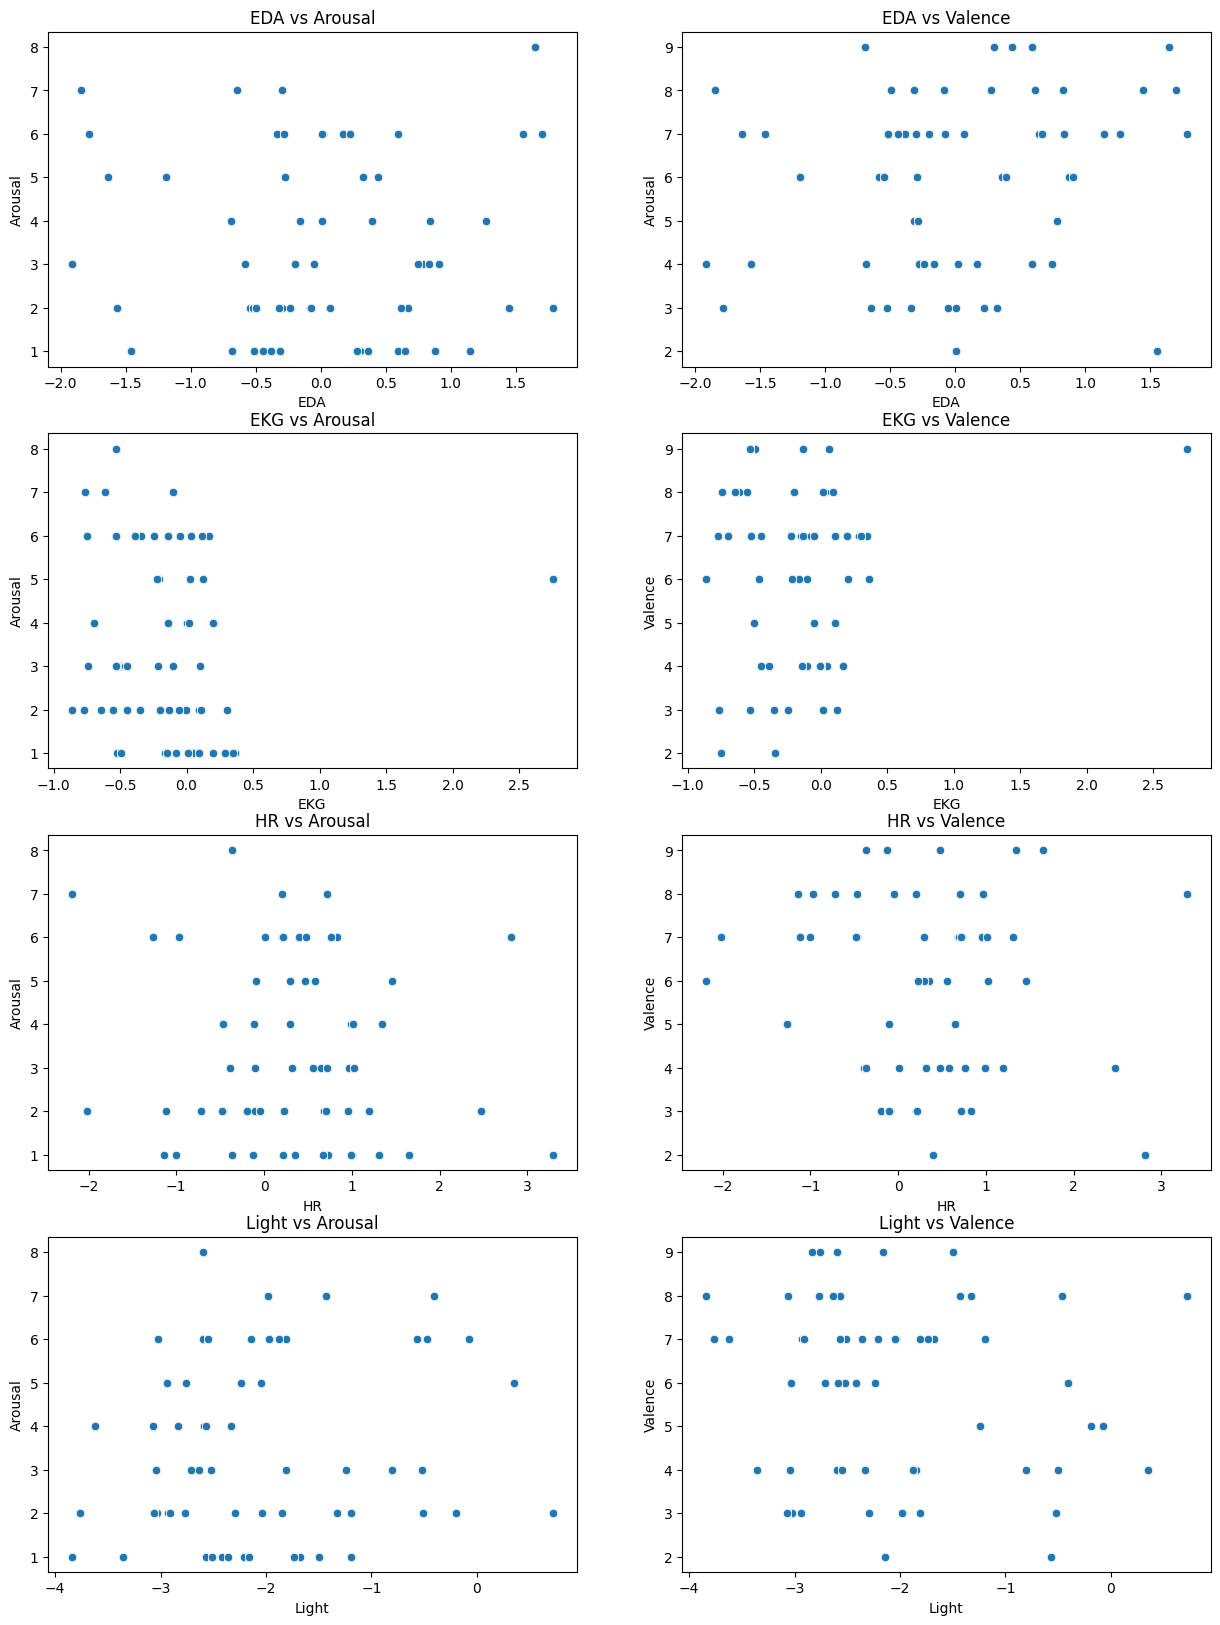

In [35]:
# Arousal vs EDA, EKG, HR, light

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

sns.scatterplot(data=df, x="EDA", y="arousal_rating", ax=axs[0, 0])
axs[0, 0].set_title("EDA vs Arousal")
axs[0, 0].set_xlabel("EDA")
axs[0, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="EDA", y="valence_rating", ax=axs[0, 1])
axs[0, 1].set_title("EDA vs Valence")
axs[0, 1].set_xlabel("EDA")
axs[0, 1].set_ylabel("Arousal")

sns.scatterplot(data=df, x="EKG", y="arousal_rating", ax=axs[1, 0])
axs[1, 0].set_title("EKG vs Arousal")
axs[1, 0].set_xlabel("EKG")
axs[1, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="EKG", y="valence_rating", ax=axs[1, 1])
axs[1, 1].set_title("EKG vs Valence")
axs[1, 1].set_xlabel("EKG")
axs[1, 1].set_ylabel("Valence")

sns.scatterplot(data=df, x="HR", y="arousal_rating", ax=axs[2, 0])
axs[2, 0].set_title("HR vs Arousal")
axs[2, 0].set_xlabel("HR")
axs[2, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="HR", y="valence_rating", ax=axs[2, 1])
axs[2, 1].set_title("HR vs Valence")
axs[2, 1].set_xlabel("HR")
axs[2, 1].set_ylabel("Valence")

sns.scatterplot(data=df, x="light", y="arousal_rating", ax=axs[3, 0])
axs[3, 0].set_title("Light vs Arousal")
axs[3, 0].set_xlabel("Light")
axs[3, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="light", y="valence_rating", ax=axs[3, 1])
axs[3, 1].set_title("Light vs Valence")
axs[3, 1].set_xlabel("Light")
axs[3, 1].set_ylabel("Valence")

plt.show()


In [36]:
df.shape

(192681, 50)